In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [2]:
df_raw = pd.read_csv('./HMEQ.csv',encoding='cp949')
df_raw

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16.0,0,0.0,221.808717,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16.0,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15.0,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14.0,0,0.0,213.892709,0.0,16,34.340882


In [3]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
df_raw['VALUE'].fillna(df_raw['VALUE'].mean(),inplace=True)
df_raw['CLAGE'].fillna(df_raw['CLAGE'].mean(),inplace=True)
df_raw['YOJ'].fillna(int(df_raw['YOJ'].mode()[0]),inplace=True)
df_raw['DELINQ'].fillna(int(df_raw['DELINQ'].mode()[0]),inplace=True)
df_raw['NINQ'].fillna(int(df_raw['NINQ'].mode()[0]),inplace=True)

In [5]:
df_raw.isnull().sum(axis=0)

BAD         0
LOAN        0
MORTDUE     0
VALUE       0
REASON      0
JOB        81
YOJ         0
DEROG       0
DELINQ      0
CLAGE       0
NINQ        0
CLNO        0
DEBTINC     0
dtype: int64

In [6]:
df_raw_dummy=pd.get_dummies(df_raw)
df_raw_dummy

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,16.0,0,0.0,221.808717,0.0,16,36.112347,1,0,0,0,1,0,0,0
3744,0,89000,54576,92937.0,16.0,0,0.0,208.692070,0.0,15,35.859971,1,0,0,0,1,0,0,0
3745,0,89200,54045,92924.0,15.0,0,0.0,212.279697,0.0,15,35.556590,1,0,0,0,1,0,0,0
3746,0,89800,50370,91861.0,14.0,0,0.0,213.892709,0.0,16,34.340882,1,0,0,0,1,0,0,0


In [7]:
df_raw_dummy.isnull().sum(axis=0)

BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_DebtCon    0
REASON_HomeImp    0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64

In [8]:
df_raw_x=df_raw_dummy.drop("BAD", axis=1, inplace=False)
df_raw_y=df_raw_dummy["BAD"]




In [9]:
df_train_x, df_test_x,df_train_y, df_test_y= train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))


train data X size: (2623, 18)
train data Y size: (2623,)
test data X size: (1125, 18)
test data Y size: (1125,)


In [10]:
model=["DecisionTree", "RandomForest", "GradientBoosting", "NeuralNet"]

train_accuracy=[]; test_accuracy=[]
model_f1_score=[]
model_auc=[]


In [11]:
dt_model=DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)
dt_model.fit(df_train_x, df_train_y)

train_accuracy.append(dt_model.score(df_train_x, df_train_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred=dt_model.predict(df_test_x)
fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)



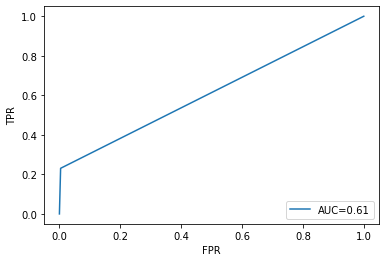

In [12]:
plt.plot(fpr, tpr, label="AUC=%0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

model_f1_score.append(f1_score(df_test_y, y_pred))

In [13]:
rf_model=RandomForestClassifier(min_samples_leaf=20, max_depth=4, n_estimators=100, random_state=1234)
rf_model.fit(df_train_x, df_train_y)

train_accuracy.append(rf_model.score(df_train_x, df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

y_pred=rf_model.predict(df_test_x)

fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)



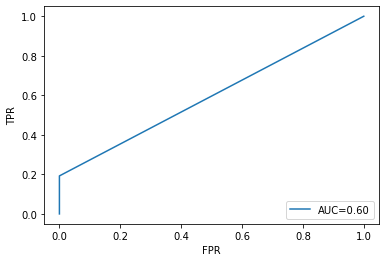

In [14]:
plt.plot(fpr, tpr, label="AUC=%0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

model_f1_score.append(f1_score(df_test_y, y_pred))

In [15]:
gb_final=GradientBoostingClassifier(min_samples_leaf=10, max_depth=4, n_estimators=100, learning_rate=1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

y_pred=gb_final.predict(df_test_x)

fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)


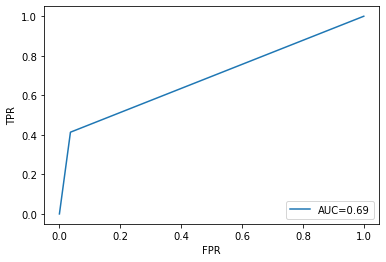

In [16]:
plt.plot(fpr, tpr, label="AUC=%0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

model_f1_score.append(f1_score(df_test_y, y_pred))

In [17]:
v_feature_names = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)



In [18]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_test_x.shape))


train data X size : (2623, 18)
train data Y size : (1125, 18)


In [19]:
nn_model = MLPClassifier(hidden_layer_sizes = (80, 80), activation = "relu", solver = "adam", random_state = 1234)
nn_model.fit(df_scaled_train_x, df_train_y)


train_accuracy.append(nn_model.score(df_scaled_train_x, df_train_y))
test_accuracy.append(nn_model.score(df_scaled_test_x, df_test_y))

y_pred = nn_model.predict(df_scaled_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


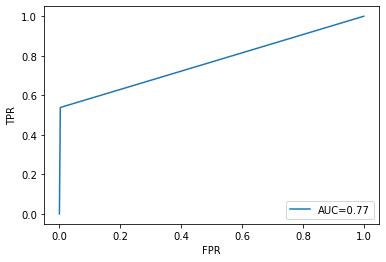

In [20]:
plt.plot(fpr, tpr, label="AUC=%0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

model_f1_score.append(f1_score(df_test_y, y_pred))

In [21]:
df_eval=pd.DataFrame(index=model)
df_eval["TrainAccuracy"]=train_accuracy
df_eval["TestAccuracy"]=test_accuracy
df_eval["F1Score"]=model_f1_score
df_eval["AUC"]=model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DecisionTree,0.930,0.925,0.364,0.613
RandomForest,0.927,0.925,0.323,0.596
GradientBoosting,0.975,0.913,0.467,0.689
NeuralNet,1.000,0.955,0.687,0.768


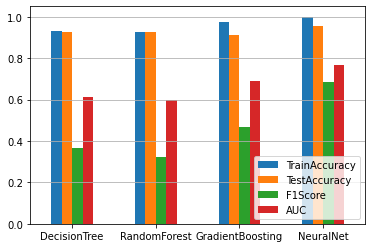

In [22]:
df_eval.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.grid(axis="y")
